# MOunting the Drive Content

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install tensorflow==2.2.0 keras==2.3.1

     |████████████████████████████████| 516.2MB 36kB/s 
     |████████████████████████████████| 378kB 39.1MB/s 
     |████████████████████████████████| 3.0MB 36.1MB/s 
     |████████████████████████████████| 460kB 40.8MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


# Importing Library

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


In [ ]:
import os
import time
x=!nvidia-smi
count=0
for i in x:
    if "============" in i:
        count+=1
        break
    count+=1
if 'p100' in x[count].lower():
    print("found")
else:
    print(x[count])
    time.sleep(1)
    #os._exit(00)

found


# Data Exploration

In [ ]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/leaf-disease/input/train'
test_path = '/content/drive/MyDrive/leaf-disease/input/test'

# Image Scaling & Processing

In [ ]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


# Deep Learning Model

# VGG19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
vgg19=VGG19(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
x11= Flatten()(vgg19.output)
prediction11 = Dense(3, activation='softmax')(x11)
model11 = Model(inputs = vgg19.inputs, outputs = prediction11)
model11.summary()
model11.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model11.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
4/4 [==============================] - 55s 14s/step - loss: 46.3826 - accuracy: 0.4250 - val_loss: 1.1434 - val_accuracy: 0.3333
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 1.4997 - accuracy: 0.3167 - val_loss: 1.1433 - val_accuracy: 0.3333
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 1.1354 - accuracy: 0.3583 - val_loss: 1.2702 - val_accuracy: 0.3333
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 1.3589 - accuracy: 0.3417 - val_loss: 1.1037 - val_accuracy: 0.3333
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 1.1368 - accuracy: 0.3000 - val_loss: 1.1160 - val_accuracy: 0.3333
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 1.1355 - accuracy: 0.3333 - val_loss: 1.0984 - val_accuracy: 0.3333


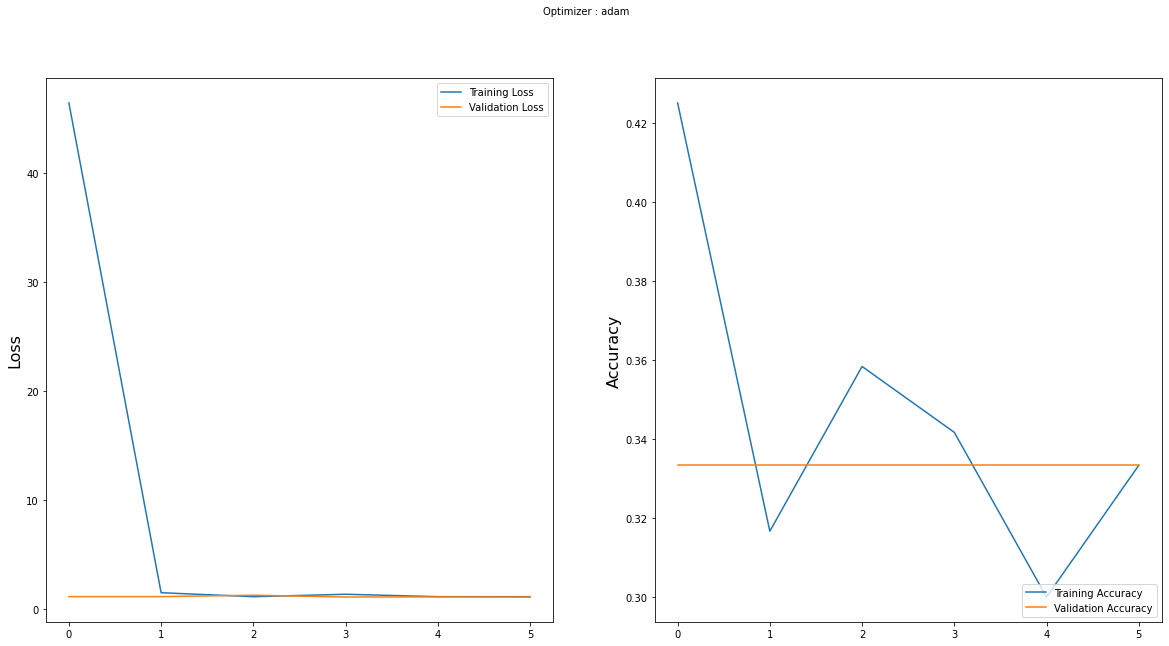

In [ ]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# InceptionV3 Model

In [ ]:
mob = InceptionV3(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
x1= Flatten()(mob.output)
prediction1 = Dense(3, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
r1 = model12.fit_generator(train_set, validation_data=test_set, epochs=50, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
4/4 [==============================] - 39s 10s/step - loss: 3.5557 - accuracy: 0.5417 - val_loss: 3.6142 - val_accuracy: 0.5500
Epoch 2/50
4/4 [==============================] - 2s 542ms/step - loss: 0.9095 - accuracy: 0.8250 - val_loss: 17.8104 - val_accuracy: 0.3583
Epoch 3/50
4/4 [==============================] - 2s 539ms/step - loss: 0.6818 - accuracy: 0.8917 - val_loss: 64.4027 - val_accuracy: 0.4000
Epoch 4/50
4/4 [==============================] - 2s 582ms/step - loss: 3.2550 - accuracy: 0.8500 - val_loss: 159.3355 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 2s 545ms/step - loss: 0.8917 - accuracy: 0.8667 - val_loss: 285.7456 - val_accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 2s 543ms/step - loss: 0.3269 - accuracy: 0.9250 - val_loss: 340.9417 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 2s 560ms/step - loss: 0.383

In [ ]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Inception ResNet V2

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 1s 0us/step


In [ ]:
x31 = Flatten()(inc.output)
predictionss = Dense(3, activation='softmax')(x31)

In [ ]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [ ]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set, validation_data=test_set, epochs=200, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Epoch 1/200
4/4 [==============================] - 6s 1s/step - loss: 3.3093 - accuracy: 0.4250 - val_loss: 15.3923 - val_accuracy: 0.3750
Epoch 2/200
4/4 [==============================] - 3s 631ms/step - loss: 1.6039 - accuracy: 0.8167 - val_loss: 5.2980 - val_accuracy: 0.6000
Epoch 3/200
4/4 [==============================] - 2s 623ms/step - loss: 0.5258 - accuracy: 0.8917 - val_loss: 3.0539 - val_accuracy: 0.5000
Epoch 4/200
4/4 [==============================] - 3s 635ms/step - loss: 0.2622 - accuracy: 0.9500 - val_loss: 9.5752 - val_accuracy: 0.3333
Epoch 5/200
4/4 [==============================] - 3s 627ms/step - loss: 0.5708 - accuracy: 0.9333 - val_loss: 439.3525 - val_accuracy: 0.3333
Epoch 6/200
4/4 [==============================] - 3s 629ms/step - loss: 0.2590 - accuracy: 0.9667 - val_loss: 955.9320 - val_accuracy: 0.3417
Epoch 7/200
4/4 [==============================] - 3s 630ms/step - loss: 0.0620 - accuracy: 0.9750 - val_loss: 99.6557 - val_accuracy: 0.3917
Epoch 8/20

In [ ]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Model Saving

In [ ]:
modelss.save('/content/drive/MyDrive/leaf-disease/model.h5')